Si prega di compilare il modulo (le tue informazioni)
**Please fill in the form (your information)

In [ ]:
#Codice: Esame2-G2-A


#Nome:

#Cognome:

#Matricola:



**Domanda1**: Considera il dataset “breast_cancer” da Sklearn e classifica i tipi di tumore utilizzando un classificatore Random Forest. Esegui una validazione incrociata con 5 fold e stampa i risultati medi di accuratezza. Utilizza il 70% dei dati per l’addestramento. Predici le etichette sul set di test, calcola e traccia la matrice di confusione. Traccia l’importanza delle caratteristiche dal modello Random Forest per visualizzare quali caratteristiche sono più importanti per la classificazione. Stampa i nomi delle tre caratteristiche meno importanti. (10 punti)
==============================================================================================================
**Question1:** Consider the "breast_cancer" dataset from Sklearn and classify tumor types using a Random Forest classifier. Consider 5 cross-validations and print the mean results of accuracy. Use 70% of the data for training. Predict the labels on the test set, compute, and plot the confusion matrix. Plot the feature importance from the Random Forest model to visualize which features are most important for the classification. print the name of three features that are less important  (10 points)

Validazione Incrociate:  0.9547468354430378
Matrice di Confusione:
 [[ 59   0]
 [  3 109]]


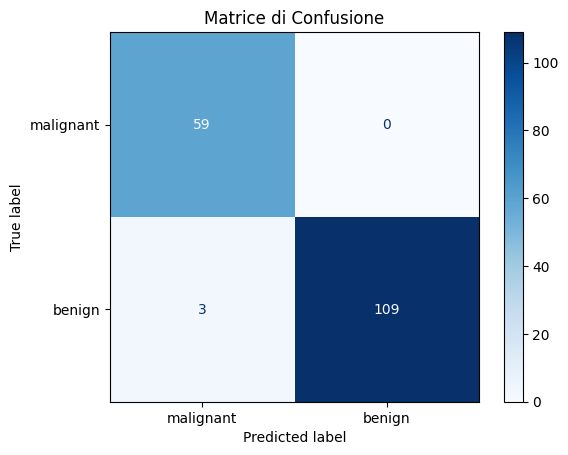

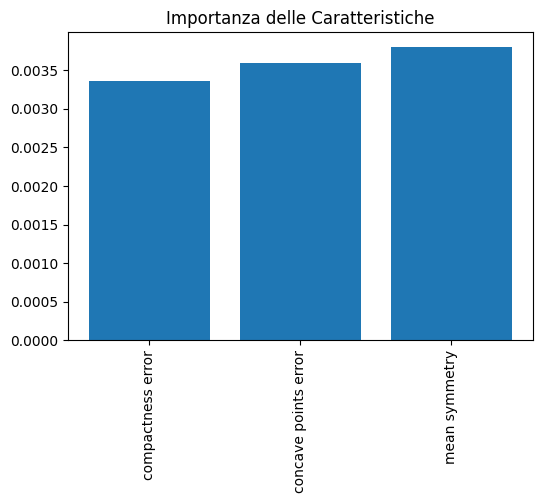

In [14]:
# import libraries (remember to add all needed libraries) 
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
# load the dataset 
cancer = load_breast_cancer()
# define the data and target (labels)
X = cancer.data
y = cancer.target

# Devide dataset to training and test (use 70% for training)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Define random forest classifier (use 100 estimators)

rf_clf = RandomForestClassifier()

# use the cross validations on training 
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

# print the scores
print("Validazione Incrociate: ",cv_scores.mean())
# apply the model on data 
rf_clf.fit(X_train, y_train)

# predict the labels 
y_pred = rf_clf.predict(X_test)

# Calculate and print the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice di Confusione:\n", conf_matrix)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice di Confusione')
plt.show()


# calculate the feature importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[:3]
feature_names = [cancer.feature_names[i] for i in indices]

# print the feature importance
plt.figure(figsize=(6, 4))
plt.title("Importanza delle Caratteristiche")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)),feature_names , rotation=90)
plt.show()


**Domanda2**: Considera il dataset “make_blobs” da Sklearn. Esegui il clustering K-Means (K=3 cluster). Per generare il dataset, usa 300 campioni, 2 caratteristiche e 3 centri. Introduci valori mancanti casuali nel 10% del dataset, quindi imputa questi valori mancanti utilizzando il metodo di imputazione della media. Esegui il clustering K-Means sia sul dataset originale che su quello con i valori imputati. Traccia i punti dati raggruppati e calcola e traccia i centri dei cluster. Confronta i risultati del clustering con e senza dati mancanti per osservare gli effetti dell’imputazione dei dati. (10 punti)
==============================================================================================================
**Question2:** Consider the "make_blobs" dataset from Sklearn. Perform K-Means clustering (K=3 clusters). To generate the dataset, use 300 samples, 2 features, and 3 centers. Introduce random missing values to 10% of the dataset, then impute these missing values using the mean imputation method. Perform K-Means clustering on both the original dataset and the dataset with imputed values. Plot the clustered data points and calculate and plot the cluster centers. Compare the clustering results with and without missing data to observe the effects of data imputation. (10 points)

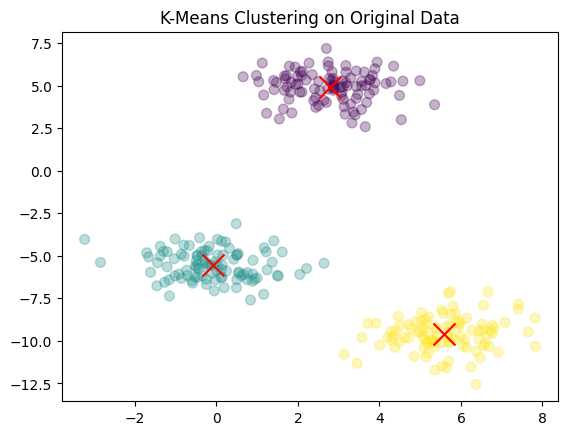

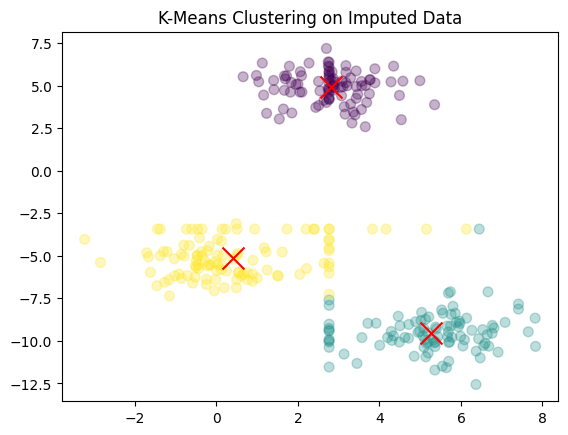

In [28]:
# import libraries
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

np.random.seed(10)
# Generate the dataset
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3)

# Introduce random missing values
rng = np.random.default_rng(seed=42)

missing_mask = rng.random(X.shape) < .1  # 10% missing values
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# Impute the missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_missing)

# Perform K-Means clustering on both original and imputed datasets
kmeans_original = KMeans(n_clusters=3)
kmeans_imputed = KMeans(n_clusters=3)

kmeans_original.fit(X)
kmeans_imputed.fit(X_imputed)

# Visualize the results
def plot_clusters(X, kmeans, title):
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis', alpha=.3)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1], c='red', s=250, marker='x')
    plt.title(title)
    plt.show()

# Plotting clusters for original data
plot_clusters(X, kmeans_original, "K-Means Clustering on Original Data")

# Plotting clusters for imputed data
plot_clusters(X_imputed, kmeans_imputed, "K-Means Clustering on Imputed Data")


**Domanda3**: Considera il dataset “wine” di Sklearn. Trova il numero ottimale di cluster (K) utilizzando l’algoritmo di clustering K-Means. Imposta i valori di K da 1 a 10, calcola la somma dei quadrati all’interno del cluster (inertia o SSE) e il punteggio silhouette per ogni K. Traccia i valori di inertia e i punteggi silhouette rispetto al numero di cluster (K), e identifica il valore di K ottimale basato sul punteggio silhouette e inertia. (10 punti)
============================================================================================================
**Question3:** Consider the "wine" dataset from Sklearn.  Find the optimal number of clusters (K) using the K-Means clustering algorithm.  Set K values ranging from 1 to 10, compute the cluster sum of squares (inertia) and the silhouette score for each K, plot the inertia values and silhouette scores against the number of clusters (K), and identify the optimal K based on the silhouette score and inertia. (10 points)

The optimal number of clusters based on the elbow method is: 2


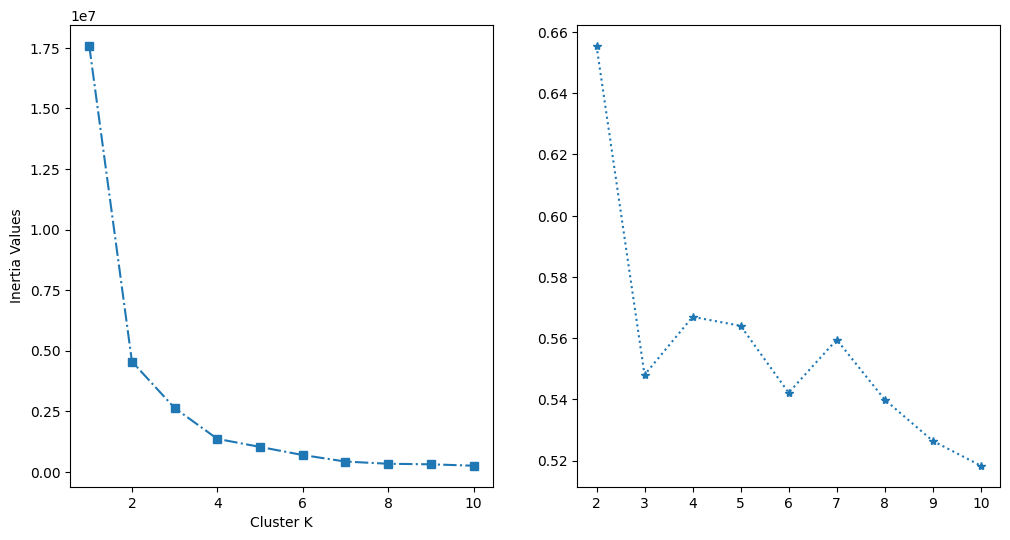

In [20]:
# load libraries
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score

# Load the wine dataset
wine = load_wine()

#define the data for clustering 
X = wine.data


# Train 10 K-Means models with K values ranging from 1 to 10
K_range = range(1,11)
inertia_values = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    else:
        silhouette_scores.append('nan')


# Plot the inertia values against the number of clusters (K)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(K_range, inertia_values, marker='s', linestyle='-.')
plt.xlabel("Cluster K")
plt.ylabel("Inertia Values")

# Plot the silhouette scores against the number of clusters (K)
plt.subplot(1,2,2)
plt.plot(K_range[1:], silhouette_scores[1:], marker='*', linestyle=':')

#  # Manually chosen based on visual inspection of the previous plots
optimal_K = np.argmax(silhouette_scores[1:])+2
print(f'The optimal number of clusters based on the elbow method is: {optimal_K}')
